In [1]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings("ignore")
data1=pd.read_csv("calories.csv")
data1.head()

User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0

In [3]:
data2=pd.read_csv("exercise.csv")
data2.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8

In [4]:
data = pd.merge(data2, data1, on="User_ID", how="left")
data.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0

In [5]:
print(data.columns)


Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')


In [6]:
print(data1.columns)
print(data2.columns)

Index(['User_ID', 'Calories'], dtype='object')
Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')


# data preprocessing

In [7]:
data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [8]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14995    False
14996    False
14997    False
14998    False
14999    False
Length: 15000, dtype: bool

In [9]:
data.describe()

User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000      1.000000   
25%    1.247419e+07     28.000000    164.000000     63.000000      8.000000   
50%    1.499728e+07     39.000000    175.000000     74.000000     16.000000   
75%    1.744928e+07     56.000000    185.000000     87.000000     23.000000   
max    1.999965e+07     79.000000    222.000000    132.000000     30.000000   

         Heart_Rate     Body_Temp      Calories  
count  15000.000000  15000.000000  15000.000000  
mean      95.518533     40.025453     89.539533  
std        9.583328      0.779230     62.456978  
min       67.000000     37.100000      1.000000  
25%       88.000000     39.600000     35.000000  
50%       96.000000     40.200000     79.000000  
75%      103.000000     40.600000    138.000000  
max      128.000000     41.500000    314.000000

In [10]:
data.shape

(15000, 9)

In [11]:
X = data.drop(["User_ID", "Calories"], axis=1) 
y = data["Calories"]

In [12]:
X

Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0        male   68   190.0    94.0      29.0       105.0       40.8
1      female   20   166.0    60.0      14.0        94.0       40.3
2        male   69   179.0    79.0       5.0        88.0       38.7
3      female   34   179.0    71.0      13.0       100.0       40.5
4      female   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995  female   20   193.0    86.0      11.0        92.0       40.4
14996  female   27   165.0    65.0       6.0        85.0       39.2
14997  female   43   159.0    58.0      16.0        90.0       40.1
14998    male   78   193.0    97.0       2.0        84.0       38.3
14999    male   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]

In [13]:
y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

In [14]:
print(data.columns)

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
print("Before encoding:", data["Gender"].unique())
data["Gender"] = le.fit_transform(data["Gender"])
print("After encoding:", data["Gender"].unique())
print(dict(zip(le.classes_, range(len(le.classes_)))))


Before encoding: ['male' 'female']
After encoding: [1 0]
{'female': 0, 'male': 1}


In [16]:
print(data["Gender"].unique())


[1 0]


In [17]:
data.tail()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
14995  15644082       0   20   193.0    86.0      11.0        92.0       40.4   
14996  17212577       0   27   165.0    65.0       6.0        85.0       39.2   
14997  17271188       0   43   159.0    58.0      16.0        90.0       40.1   
14998  18643037       1   78   193.0    97.0       2.0        84.0       38.3   
14999  11751526       1   63   173.0    79.0      18.0        92.0       40.5   

       Calories  
14995      45.0  
14996      23.0  
14997      75.0  
14998      11.0  
14999      98.0

# Data Visualization

 Calories Burned

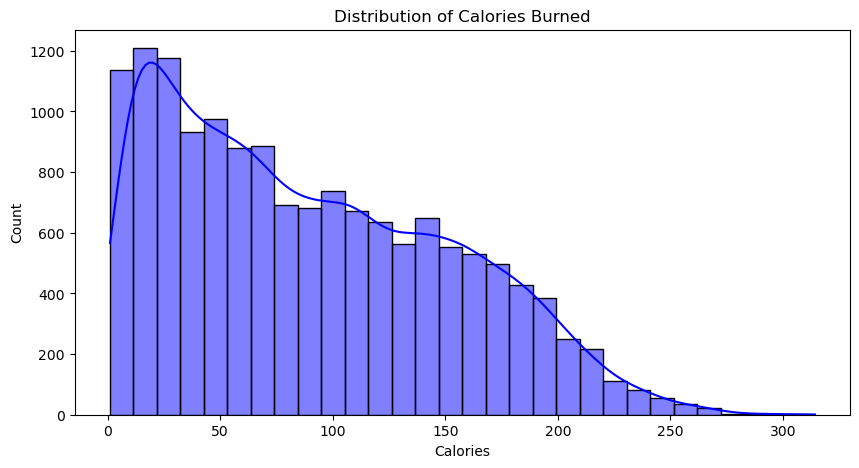

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(data["Calories"], bins=30, kde=True, color="blue")
plt.title("Distribution of Calories Burned")
plt.xlabel("Calories")
plt.ylabel("Count")
plt.show()

Box Plot for Calories (Detect Outliers)

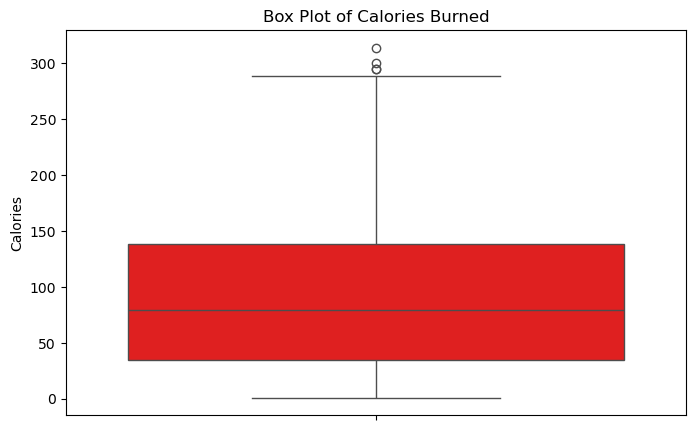

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=data["Calories"], color="red")
plt.title("Box Plot of Calories Burned")
plt.ylabel("Calories")
plt.show()

 Gender Distribution

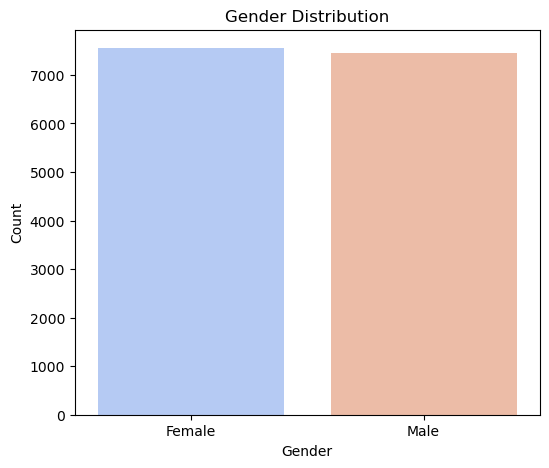

In [20]:
plt.figure(figsize=(6, 5))
sns.countplot(x=data["Gender"], palette="coolwarm")
plt.title("Gender Distribution")
plt.xticks(ticks=[0, 1], labels=["Female", "Male"])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

Scatter Plot: Duration vs Calories Burned

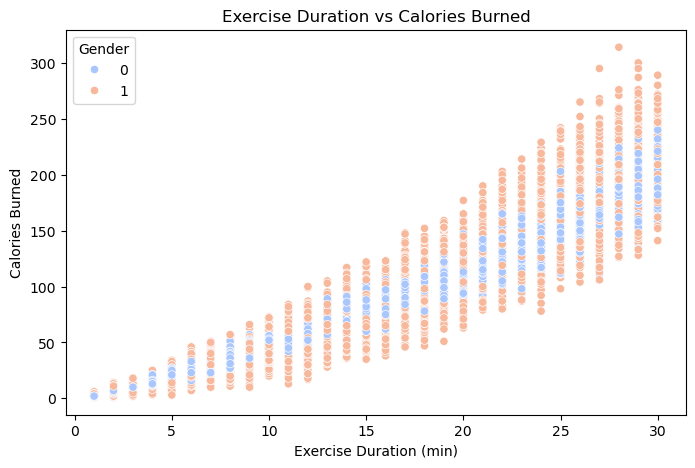

In [21]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data["Duration"], y=data["Calories"], hue=data["Gender"], palette="coolwarm")
plt.title("Exercise Duration vs Calories Burned")
plt.xlabel("Exercise Duration (min)")
plt.ylabel("Calories Burned")
plt.show()


Pair Plot for Feature Relationships

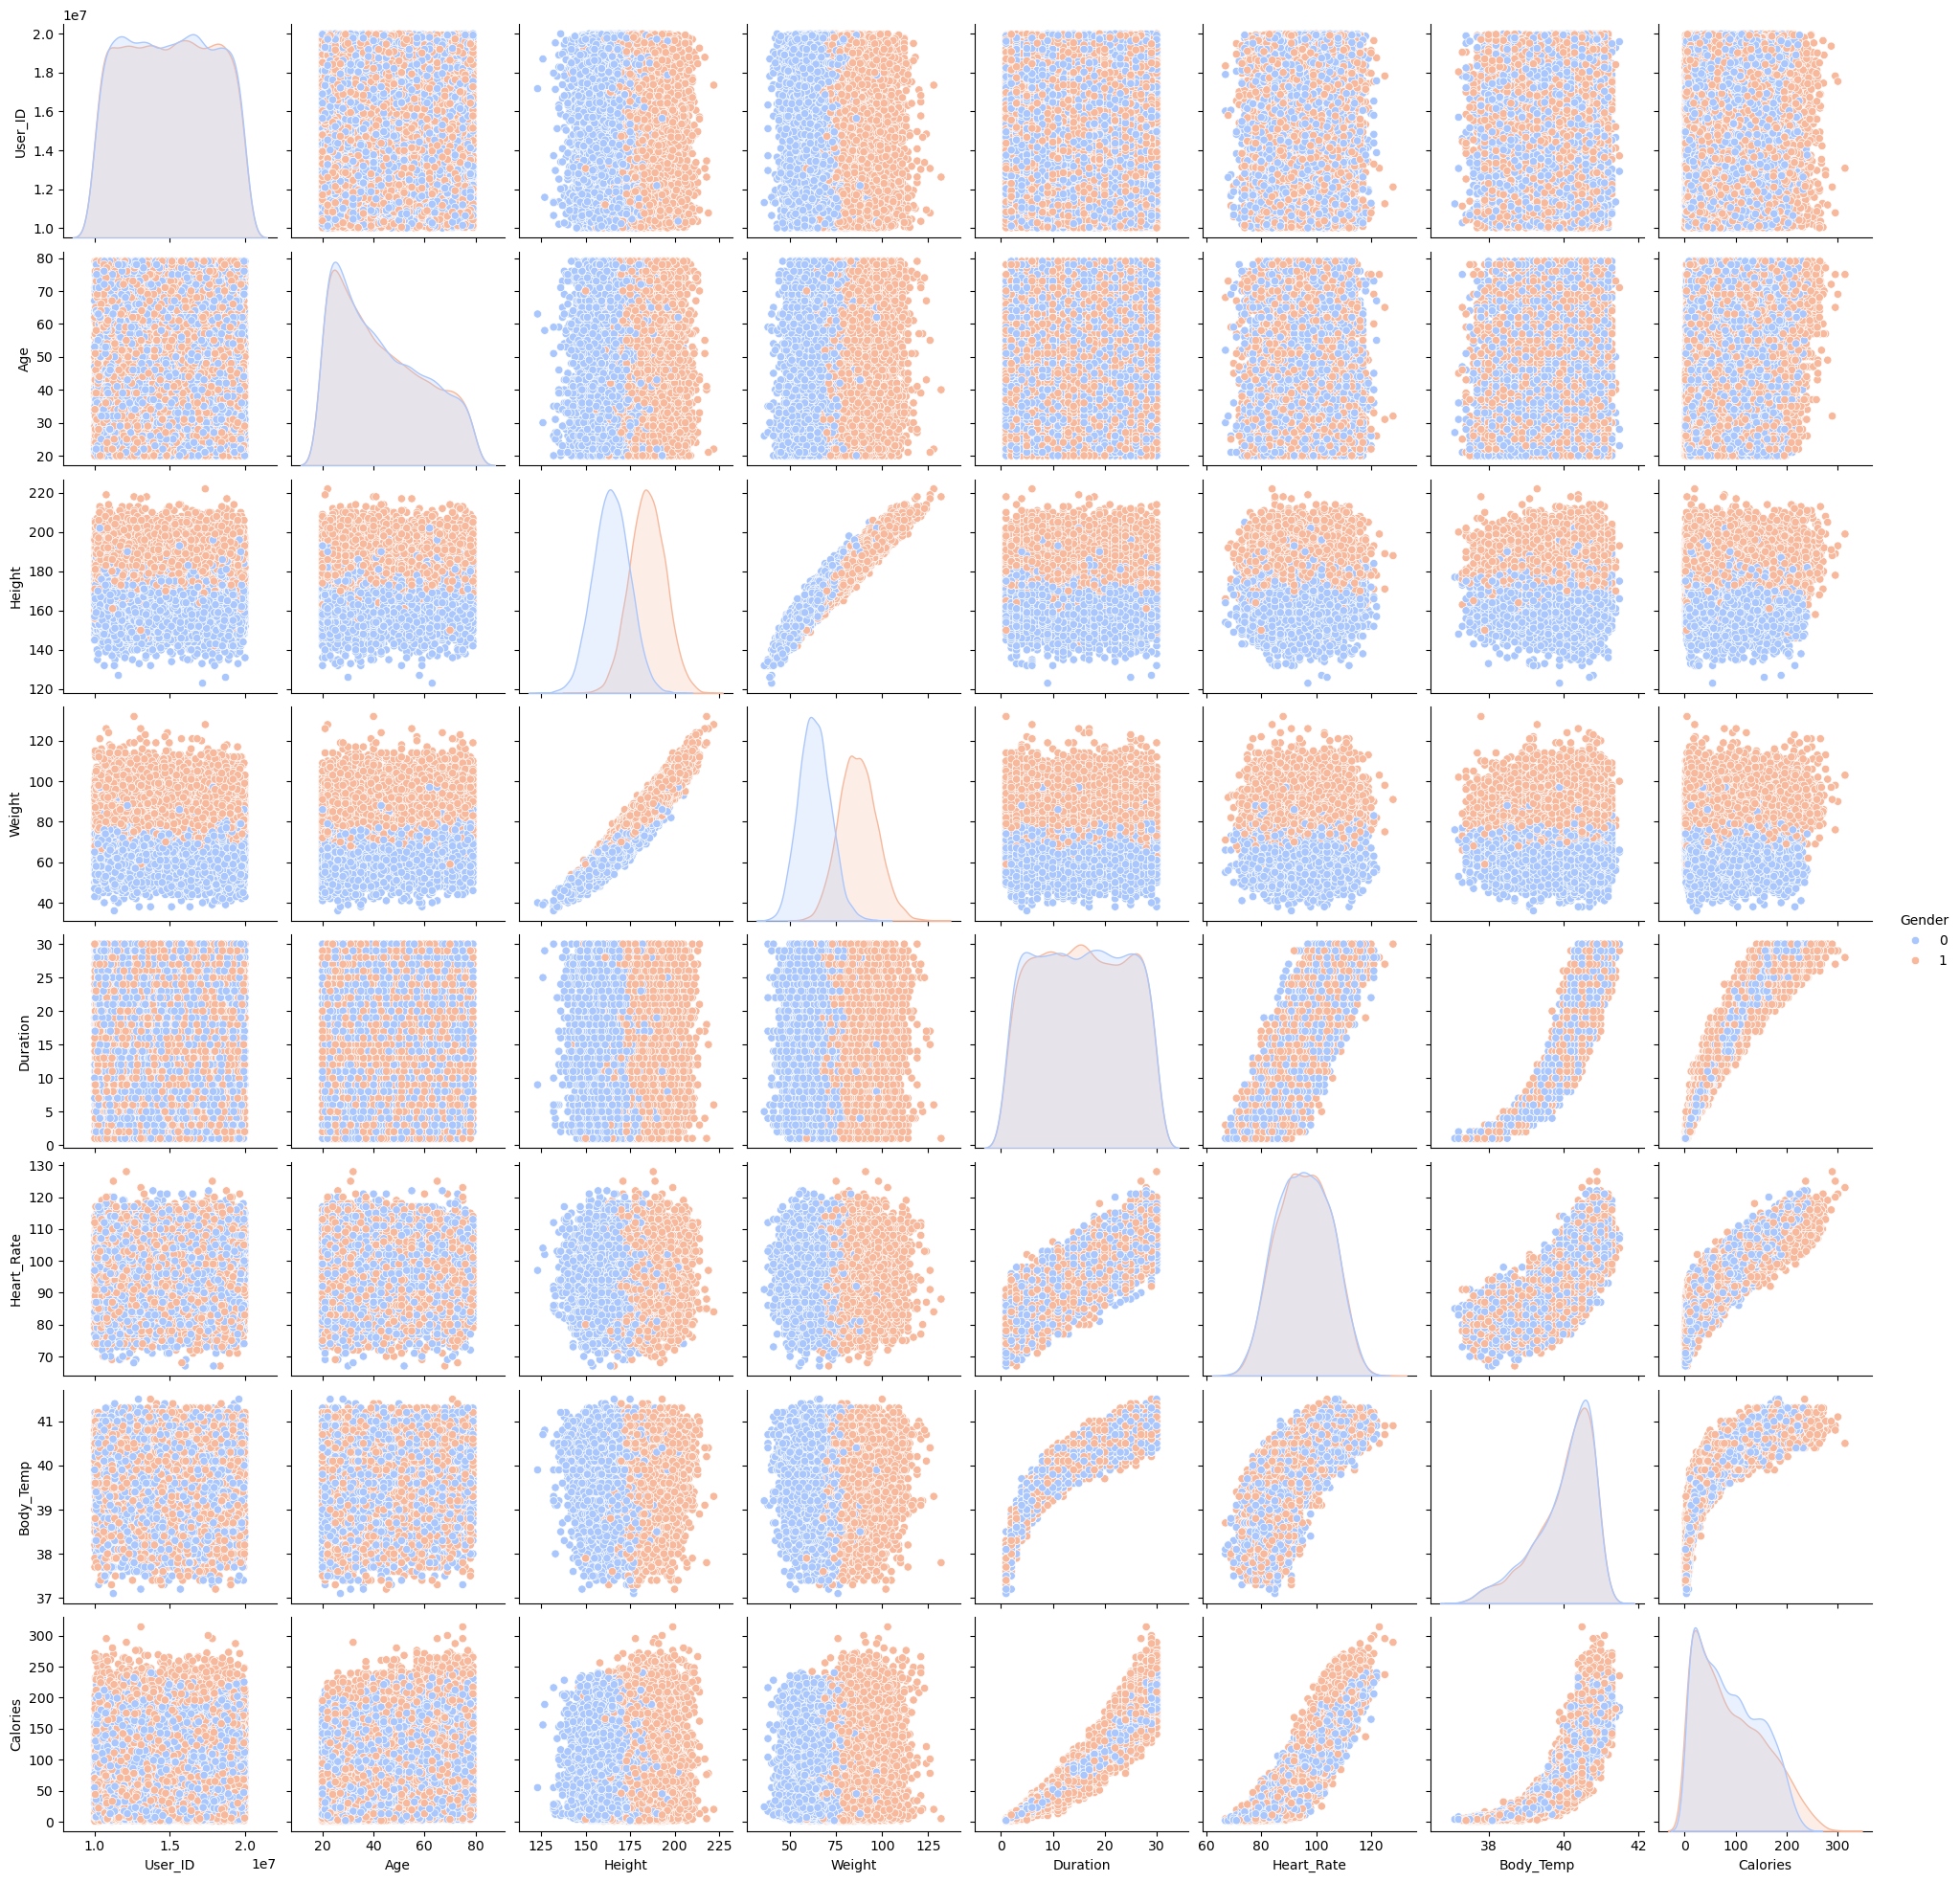

In [22]:
sns.pairplot(data, hue="Gender", diag_kind="kde", palette="coolwarm")
plt.show()

# model selection

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X = data.drop(["User_ID", "Calories"], axis=1)
y = data["Calories"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(y_pred[:10])


[171.   192.97  52.82 159.5  220.99 177.71  97.59  45.35  80.45  59.08]


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [25]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(model,X_scaled,y,cv=kf,scoring="r2")

In [26]:
print(f"Cross-Validation R² Scores: {cv}")
print(f"Mean R² Score: {np.mean(cv)}")
print(f"Standard Deviation of R² Scores: {np.std(cv)}")

Cross-Validation R² Scores: [0.99818223 0.9977632  0.99807348 0.99782448 0.99768223]
Mean R² Score: 0.9979051208510631
Standard Deviation of R² Scores: 0.0001905040794196182


In [27]:
data.sample(10)

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
6724   18934193       0   79   174.0    72.0      24.0        91.0       40.6   
8254   17117423       0   49   175.0    70.0      17.0       101.0       40.5   
12817  15792135       1   57   165.0    71.0      18.0        98.0       40.6   
12991  12063088       1   70   191.0    90.0       9.0        91.0       39.5   
11987  13225521       1   48   178.0    85.0      16.0        88.0       40.5   
3783   12948429       0   40   145.0    49.0       1.0        87.0       38.0   
523    15173138       0   59   156.0    58.0      19.0        91.0       40.3   
13022  13580820       0   40   166.0    63.0      10.0        86.0       39.7   
10346  15887550       0   25   172.0    69.0      18.0        96.0       40.5   
1094   14843952       0   20   151.0    51.0      27.0       101.0       41.1   

       Calories  
6724      126.0  
8254       99.0  
12817     106.0  
12991      53.0  
11987      68.0  
3783        4.0  
523        97.0  
13022      42.0  
10346      88.0  
1094      150.0

In [28]:
  # Example for a male
sample_data = np.array([[1, 25, 175.0, 70.0, 40.0, 110.0, 39.5]])
sample_data_scaled = scaler.transform(sample_data)
predicted_calories = model.predict(sample_data_scaled)

print("Predicted Calories Burned:", predicted_calories[0])


Predicted Calories Burned: 3.02


In [29]:
  # Example for a female
sample_data = np.array([[0, 20, 175.0, 60.0, 40.0, 120.0, 30.5]])
sample_data_scaled = scaler.transform(sample_data)
predicted_calories = model.predict(sample_data_scaled)

print("Predicted Calories Burned:", predicted_calories[0])


Predicted Calories Burned: 8.97


In [32]:
  # Example for a male
sample_data = np.array([[1, 19, 110.9, 53.9, 120.0, 120.0, 30.5]])
sample_data_scaled = scaler.transform(sample_data)
predicted_calories = model.predict(sample_data_scaled)

print("Predicted Calories Burned:", predicted_calories[0])


Predicted Calories Burned: 21.29
